In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# TODO:
- isometric graphs
- motivation

# Prinicipal Component Analysis

We start with some dataset $\mathbf X\in M_{k\times n}$ of $n$ $k$-dimensional samples from some distribution. For each unit vector $v$ we can project $\mathbf X$ onto $v$ and calculate the variance of the projection. Some directions will vary more than others, and we can try to choose some orthogonal [Why orthogonal?] set of such vectors, ordered by variance. Let's give it a try. First we sample some points

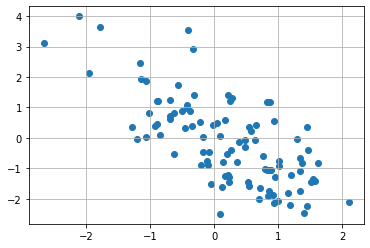

In [87]:
N = 100
X = np.random.multivariate_normal([0,0], [[1,-1],[-1,2]], N).T
plt.scatter(X[0], X[1])
plt.grid()

Now we can try to look the projection of this points on some chosen direction

var of projection onto v=[1. 0.] is 0.8543872190008419


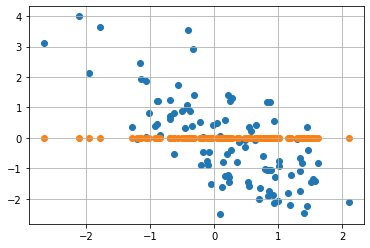

var of projection onto v=[0.24253563 0.9701425 ] is 1.4934791169522958


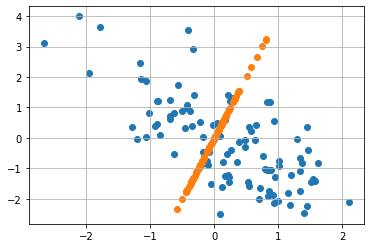

In [112]:
def plot_proj(X, *vs):
    plt.scatter(X[0], X[1])
    for v in vs:
        proj = v @ X
        plt.scatter(*(proj * v[:,None]))
    print(f"var of projection onto v={v} is {(v @ X).var()}")
    plt.grid()
    plt.show()


v = np.array([1,0])
v = v / np.linalg.norm(v)
plot_proj(X, v)

v = np.array([1,4])
v = v / np.linalg.norm(v)
plot_proj(X, v)

We can see along one direction the variance is larger. Motivated by the introduction, we try and search for the direction of largest variance. Since this problem is convex [Show!] we can use gradient ascent. Of course, the tricky part is we are actually in a constrained optimization but with a naive parametrization on some tricks we can get it to work

In [107]:
def ascend(X, seed=None):
    np.random.seed(seed)
    flip = X[0].std() > X[1].std() # hack for numeric instability
    if flip:
        X = np.flip(X, axis=0)
        
    a = np.random.uniform(-1,1);
    for i in range(100):
        v = np.array([a, np.sqrt(1-a**2)])
        proj = v @ X
        lr = 7e-4
        da = (proj * ([1, -a/np.sqrt(1-a**2)] @ X)).sum() # gradient with respect to a
        assert -1 < a + lr * da < 1, "a out of bounds"
        
        #update step
        a = a + lr * da
    v = np.array([a, np.sqrt(1-a**2)])
    if flip:
        v = np.array([np.sqrt(1-a**2), a])
    return v

var of projection onto v=[-0.49577921  0.8684486 ] is 2.519472668973124


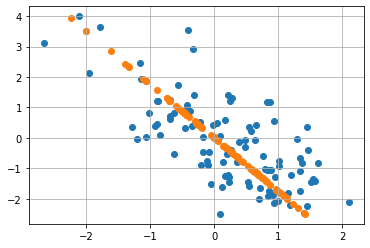

In [113]:
ev1 = ascend(X)
plot_proj(X, ev1)

Walla! we (apparently) managed to find what we wanted. How can we go about finding the second direction? If we will eventually get a collection of orthogonal vectors, then each datapoint will be a linear combination of these vectors. Maybe if we subtract our first vector from the dataset and repeat the process, we will get the next vector? [meh, i don't like this reasoning]

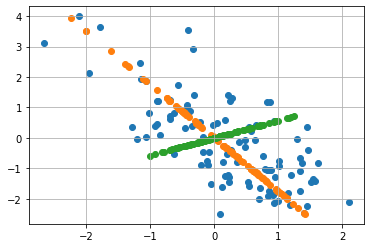

In [114]:
plt.scatter(*X)
plt.scatter(*(ev1 @ X * ev1[:, None]))
plt.scatter(*(X - ev1 @ X * ev1[:, None]))
plt.grid()

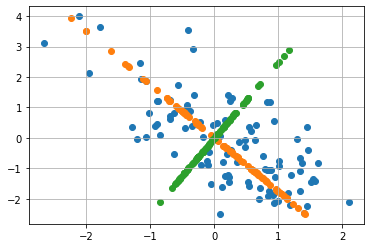

In [96]:
ev2 = descend(X - ev1 @ X * ev1[:, None]) + ev1
ev2 = ev2 / np.linalg.norm(ev2)
# plt.scatter(*(X - proj))
plot_proj(X, ev1, ev2)

We have to add back the previous vector to get the direction [but why?]